In [3]:
import numpy as np
from scipy.io.wavfile import write
from scipy.io import wavfile

samplerate = 44100 #44.1 kHz
duration = 2 #seconds
frequency = 440 #A4 note(Hz)

t=np.linspace(0, duration, int(samplerate * duration), endpoint=False)
audio=0.5*np.sin(2*np.pi*frequency*t)

#Convert to 16-bit PCM
audio=np.int16(audio*32767)

write("sample_audio.wav", samplerate, audio)


In [4]:
samplerate, data = wavfile.read("sample_audio.wav")

# Let's Play with Audiosignal

# 1.Time-Domain Plot(Waveform)

In [5]:
import matplotlib.pyplot as plt

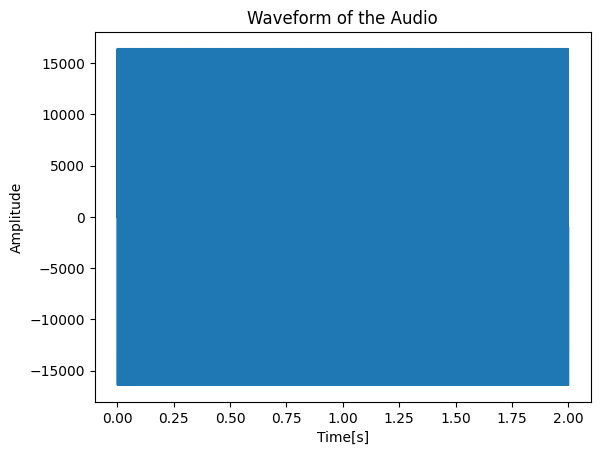

In [6]:
plt.plot(np.linspace(0, duration, len(data)), data)
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.title("Waveform of the Audio")
plt.show()

**How to interpret:**
•	X-axis = Time (in seconds)
•	Y-axis = Amplitude (volume level, in PCM integer values)


**What it tells you:**
•	You can see when the audio gets louder or quieter.
•	If the waveform is dense and spiky → it's louder or more complex.
•	Quiet sections appear flatter.
•	Sudden peaks may indicate sharp sounds, like a clap or transient.
•	You can detect silences, rhythms, or repeated patterns.


# 2.Frequency-Domain Plot(FFT)

In [7]:
from scipy.fft import fft

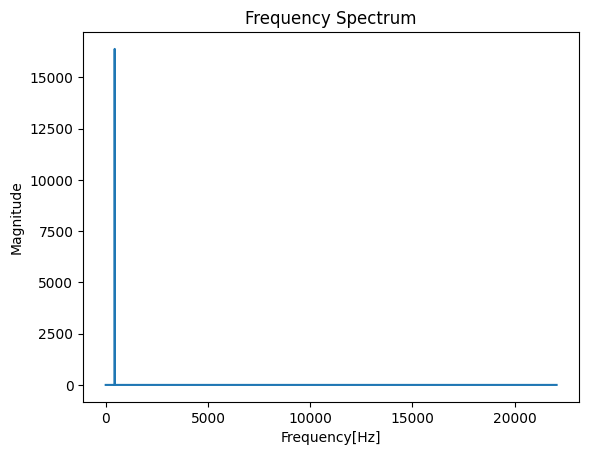

In [8]:
N = len(data)
yf = fft(data)
xf = np.linspace(0.0, samplerate/2, N//2)
plt.plot(xf, 2.0/N*np.abs(yf[0:N//2]))
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.show()

**How to interpret:**
•	X-axis = Frequency (Hz)
•	Y-axis = Magnitude (how strong each frequency is)

**What it tells you:**
•	Peaks show the dominant frequencies in the sound.
•	A single peak = pure tone (like a sine wave).
•	Multiple peaks = richer sound (like music or voice).
•	Helps in identifying pitch, harmonics, and noise.


# 3.Spectrogam(Time+Freqency)

This combines both time and frequency.


In [9]:
from scipy import signal

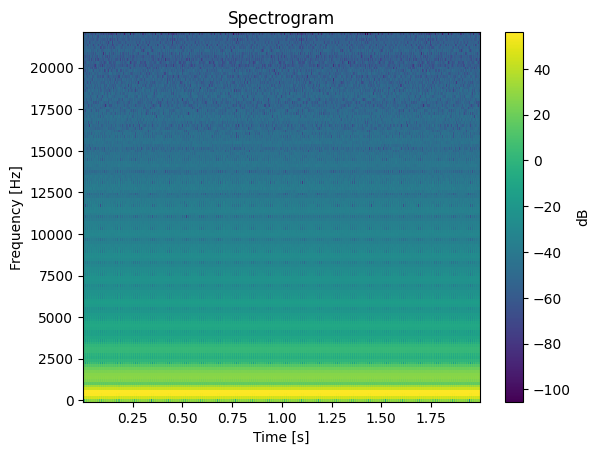

In [11]:
frequencies, times, Sxx = signal.spectrogram(data, samplerate)

plt.pcolormesh(times, frequencies, 10*np.log10(Sxx))
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.title("Spectrogram")
plt.colorbar(label="dB")
plt.show()


**How to interpret:**
•	X-axis = Time
•	Y-axis = Frequency
•	Color = Power (dB)


**What it tells you:**
•	You can see which frequencies are present at different times.
•	Useful for detecting spoken words, instrument changes, noises, etc.
•	Darker areas = louder at that frequency and time.


# Which plot for what?

Task	Best Plot	What to Look For
+ Loudness over time	Time-Domain	Amplitude envelope
+ Pitch detection / harmonics	Frequency Spectrum	Peaks at frequencies
+ Changes in tone over time	Spectrogram	Frequency bands changing over time
+ Silence, rhythm, transients	Time-Domain	Flat vs. spiky regions
+ Noise analysis	FFT / Spectrogram	Broadband vs. sharp peaks
